## Observations and Insights

In [1]:
f = open("observations/obs.txt", "r")
print(f.read())

Observations and Insights

From just a general overview of the data analysis, we can see that out of all the treatments,
there were only two treatments that showed promising results: Ramicane and Capomulin. From the summary
statistics, those two treatments were the only ones with mean and median tumor volumes below the initial
tumor volumes. Perhaps a better representation are the box plots of final tumor volumes showing those
two treatments trending below the initial tumor volume of each mouse.

We can also look more closely at data for mice treated with the Capomulin regimen, and see that it is
indeed a promising treatment showing good results for tumor reduction. While the data analysis only shows 
the line plot for one specific mouse treated with the Capomulin regimen, when changing the observed mouse 
and briefly looking at the line plots for different mice treated with Capomulin, we can see that each mouse 
shows a general downward trend of the tumor volume.

Lastly the linear re

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
#merge_df = pd.merge(bitcoin_df,dash_df,on="Date")
mouse_data = pd.merge(mouse_metadata,study_results, on = "Mouse ID")
mouse_data.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#groupby
regimen = mouse_data.groupby('Drug Regimen')
#constructing the summary table
#mean
regimen_df = pd.DataFrame(regimen['Tumor Volume (mm3)'].mean())
regimen_df = regimen_df.rename(columns = {'Tumor Volume (mm3)':'Mean Tumor Volume'})
#median
regimen_df['Median Tumor Volume'] = regimen['Tumor Volume (mm3)'].median()
#variance
regimen_df['Variance Tumor Volume'] = regimen['Tumor Volume (mm3)'].var()
#standard deviation
regimen_df['Standard Deviation Tumor Volume'] = regimen['Tumor Volume (mm3)'].std()
#SEM
regimen_df['SEM Volume'] = regimen['Tumor Volume (mm3)'].sem()
#sort them by least to greatest mean tumor volume
regimen_df = regimen_df.sort_values("Mean Tumor Volume")
regimen_df



,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Volume
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar plots

Text(0, 0.5, 'Data Points')

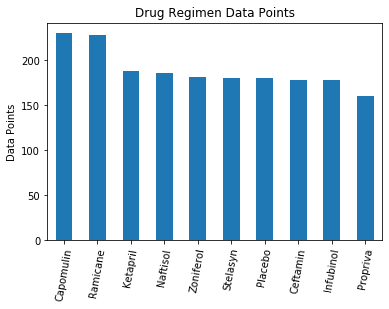

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

#originally did this but can actually just to a value_counts. comes out sorted descending too
#data_points_df = pd.DataFrame(regimen['Drug Regimen'].count())
#data_points_df = data_points_df.sort_values("Data Points",ascending=False)

data_points_df = pd.DataFrame(mouse_data['Drug Regimen'].value_counts())
data_points_df = data_points_df.rename(columns = {'Drug Regimen':'Data Points'})
#plot!
myplot = data_points_df.plot(kind = 'bar',title='Drug Regimen Data Points', legend = False, rot = 80)
myplot.set_ylabel("Data Points")
#data_points_df

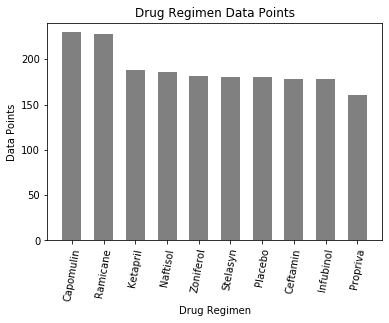

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

#reset index here so we can call the drug regimen column
data_points_df = data_points_df.reset_index()
#data_points_df
#set x and y axis from columns
x_axis= data_points_df['index']
y_axis = data_points_df['Data Points']

#construct plot
#I'll just change the color here
plt.bar(x_axis, y_axis, width = .6, color = 'gray')
#rotate the x axis labels
plt.xticks(rotation = 80) 
plt.ylim(0,max(data_points_df['Data Points'])+10)
plt.xlabel("Drug Regimen")
plt.ylabel('Data Points')
plt.title("Drug Regimen Data Points")
plt.show()

## Pie plots

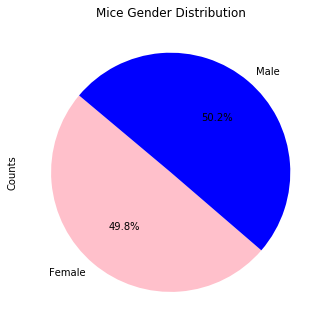

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#first we drop the mouse id duplicates, since all we care about is each unique mouse and its gender
mice_gender = mouse_data.drop_duplicates(subset='Mouse ID')
#df with gender and counts of each gender
mice_gender_df = pd.DataFrame(mice_gender.groupby('Sex').count()['Mouse ID'])
mice_gender_df =mice_gender_df.rename(columns = {'Mouse ID':'Counts'})
#construst plot
mice_gender_df.plot(kind ='pie' ,y = 'Counts', figsize = (5.5,5.5),autopct = "%.1f%%", colors = ['pink', 'blue'], legend = False,
                       title = "Mice Gender Distribution",startangle=140)
#mice_gender_df

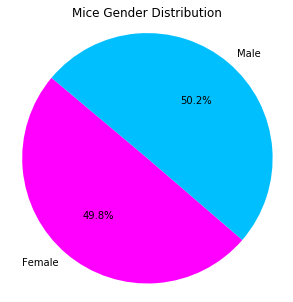

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#similar to before we need to reset the index
mice_gender_df = mice_gender_df.reset_index()

#use these columns for parameters for the pie chart
counts = mice_gender_df['Counts']
gender = mice_gender_df['Sex']

#found a bunch of colors here
#https://matplotlib.org/3.1.0/gallery/color/named_colors.html
colors = ["magenta","deepskyblue"]
#contruct plot
plt.figure(figsize = (5,5))
plt.pie(counts, colors=colors,labels=gender, autopct="%.1f%%", startangle=140)
plt.title("Mice Gender Distribution")
plt.axis("equal")
plt.show()

## Quartiles, outliers and boxplots

In [9]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.

#treatments given in directions
top_four_treatments=['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

#create df with the final tumor volumes for each mouse treated with the top four most promising treatements
#we can do a drop duplicate and keep the last row becuase that is the final timepoint for each mouse
tumor_df1 = mouse_data.drop_duplicates(subset = ['Mouse ID'], keep ='last')
tumor_df1 = tumor_df1[['Mouse ID','Drug Regimen','Tumor Volume (mm3)']]
tumor_df1 = tumor_df1.rename(columns = {'Tumor Volume (mm3)':'Final Tumor Volume'})
#filter the df down drug regimen column with only the top four treatments
tumor_df1 = tumor_df1.loc[(tumor_df1['Drug Regimen'].isin(top_four_treatments)),:]
tumor_df1=tumor_df1.reset_index(drop=True)
#tumor_df1

In [10]:
#Calculate the IQR and quantitatively determine if there are any potential outliers.

#Going to create a df with the IQR analysis, doesn't say we have to do this but seems like a good way
#data frame will include quartiles, iqr, bounds, and outlier values across the four treatments

#creating empty lists that will be used to create the IQR analysis df
#quartiles, outliers
lowerq=[]
median=[]
upperq=[]
outliercount=[]
outliervalue=[]

#use this loop to seperate each the four drug treatments and calculate quantiles.
#will append these values to the empty lists
for drug in top_four_treatments:
    drug_df = tumor_df1.loc[(tumor_df1['Drug Regimen'] == drug),:]
    quartiles = drug_df['Final Tumor Volume'].quantile([.25,.5,.75])
    lowerq.append(round(quartiles[0.25],2))
    median.append(round(quartiles[0.5],2))
    upperq.append(round(quartiles[0.75],2))

#use list comprehensions to create lists with calculated iqr and bounds from quartiles
iqr=[upperq[i]-lowerq[i] for i in range(len(lowerq))]
lower_bound=[lowerq[i]-1.5*iqr[i] for i in range(len(lowerq))]
upper_bound=[upperq[i]+1.5*iqr[i] for i in range(len(upperq))]


#this loop will actually create a seperate df with only outliers for each seperate df
#then it will append a list of outliers for each seperate treatment to the list 'outliervalue'
for i in range(len(top_four_treatments)):
    drug_df = tumor_df1.loc[(tumor_df1['Drug Regimen'] == top_four_treatments[i]),:]
    #filter with bounds
    outlier_df= drug_df.loc[((drug_df['Final Tumor Volume'] < lower_bound[i]) | 
                             (drug_df['Final Tumor Volume'] > upper_bound[i])),:]
    
    #since some of the regimen don't have any outliers, it creates an empty df, we can use the syntax of the if statement
    if outlier_df.empty == True:
        outliervalue.append('n/a')
    else:
        outliervalue.append(np.round(outlier_df['Final Tumor Volume'].values[:],2))
    
#all of our lists should be filled now and we can create our df!
iqr_df=pd.DataFrame({"Drug Regimen":top_four_treatments,
    "Lower Quartile": lowerq,
    "Median":median,
    "Upper Quartile": upperq,
    "IQR":iqr,
    "Lower Bound":lower_bound,
    "Upper Bound":upper_bound,
    "Outlier Values":outliervalue})

#set the index to drug regimen
iqr_df=iqr_df.set_index('Drug Regimen')
iqr_df

,Lower Quartile,Median,Upper Quartile,IQR,Lower Bound,Upper Bound,Outlier Values
Drug Regimen,,,,,,,
Capomulin,32.38,38.13,40.16,7.78,20.71,51.83,n/a
Ramicane,31.56,36.56,40.66,9.10,17.91,54.31,n/a
Infubinol,54.05,60.17,65.53,11.48,36.83,82.75,[36.32]
Ceftamin,48.72,59.85,64.30,15.58,25.35,87.67,n/a


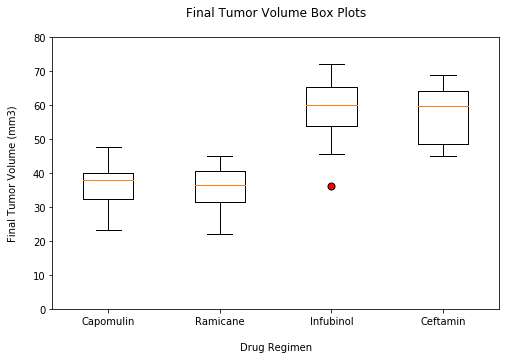

In [11]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

final_volume_values=[]

#will append a list of final tumor volumes for each seperate treatment into our list
for drug in top_four_treatments:
    drug_df = tumor_df1.loc[(tumor_df1['Drug Regimen'] == drug)]
    final_volume_values.append(drug_df["Final Tumor Volume"].tolist())

#contruct 
fig1, ax1 = plt.subplots(figsize=(8,5))
#add axis titles
ax1.set_title('Final Tumor Volume Box Plots\n')
ax1.set_xlabel('\nDrug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)\n')
#filerprops to define the outlier markers
flierprops = dict(marker='o', markerfacecolor='r', markersize=7, markeredgecolor='black')
ax1.boxplot(final_volume_values,flierprops=flierprops)
#rename the x axis ticks with the actual drug regimens
plt.xticks(np.arange(1,len(top_four_treatments)+1), top_four_treatments) 
plt.ylim(0,80)
#plt.figure(figsize=(10,6)) 
plt.show()

## Line and scatter plots

In [12]:
#find all the mice treated specifically with Capomulin
drug = 'Capomulin'
cap_mice = mouse_data.loc[(mouse_data['Drug Regimen'] == drug),['Mouse ID','Drug Regimen']]
cap_mice=cap_mice.drop_duplicates(subset = 'Mouse ID')
#cap_mice

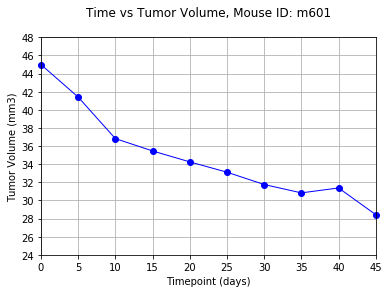

In [13]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#so this cell should create a nice formatted line plot for any mouse, just change mouse variable
mouse = 'm601'
#filter original df with mouse of our choice
mymouse= mouse_data.loc[(mouse_data['Mouse ID'] == mouse),['Mouse ID','Timepoint','Tumor Volume (mm3)','Weight (g)']]

#setting axis with columns from df
x_axis = mymouse['Timepoint']
y_axis = mymouse['Tumor Volume (mm3)']
#labels
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Time vs Tumor Volume, Mouse ID: {mouse}\n')

#setting lims and ticks using min and max values so it will format nicely for any mouse, not just specific to a single mouse
plt.xlim(0,x_axis.max())
plt.ylim((round(y_axis.min()-2),(round(y_axis.max())+2)))
plt.yticks(np.arange((round(y_axis.min())-4),(y_axis.max()+4),2))
plt.xticks(np.arange((x_axis.min()),(x_axis.max()+5),5))

#more formatting
plt.grid()
# :O so clip_on=False makes it to where the marker isnt cut off by the edge of the plot!!
plt.plot(x_axis,y_axis,marker="o", color="blue", linewidth=1,clip_on=False)
plt.show()

In [14]:
#shows the df with lineplot data for specified mouse
#mymouse

In [15]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#filter the original df with only Capomulin treated rows
#drug variable was defined earlier as 'Capomulin'
drug_filter= mouse_data.loc[(mouse_data['Drug Regimen'] == drug),:]
#groupby individual mouse
group_mouse = drug_filter.groupby(['Mouse ID'])
#create dataframe with mean tumor volume and weight of each individual mice
group_mouse_df = pd.DataFrame(group_mouse['Tumor Volume (mm3)'].mean())
group_mouse_df['Weight (g)'] = group_mouse['Weight (g)'].mean()
group_mouse_df = group_mouse_df.rename(columns = {'Tumor Volume (mm3)':'Mean Tumor Volume'})
#group_mouse_df.head()

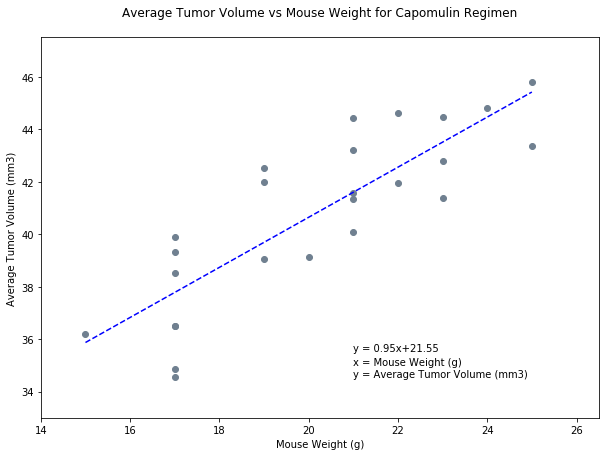

Average Tumor Volume vs Mouse Weight for Capomulin Regimen
Linear Regression Model:

y = 0.95x+21.55
x = Mouse Weight (g)
y = Average Tumor Volume (mm3)
Correlation Coefficient(R) = 0.842


In [16]:
# Calculate the correlation coefficient and linear regression model for 

#mouse weight and average tumor volume for the Capomulin regimen, columns for scatterplot

#y vs x, directions say to plot mouse weight vs avg tumor volume
#doesn't rly make sense becuase mouse weight is the independent variable so I'm going to plot tumor volume vs weight
avgtumor = group_mouse_df.iloc[:, 0]
weight = group_mouse_df.iloc[:, 1]

#(slope,int, r, p, std_err) from linregress
lin = st.linregress(weight,avgtumor)
regresslinex=np.arange(weight.min(),weight.max()+2,2)
line = regresslinex*lin[0] + lin[1]
#string presenting equation
eq = f"y = {round(lin[0],2)}x+{round(lin[1],2)}"

#scatterplot formatting
plt.figure(figsize=(10,7))
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.ylim((round(avgtumor.min()-1.5),(round(avgtumor.max())+1.5)))
plt.xlim((round(weight.min()-1.5),(round(weight.max())+1.5)))
plt.title(f'Average Tumor Volume vs Mouse Weight for {drug} Regimen\n')
plt.scatter(y=avgtumor,x=weight,color='slategrey')


#plotting linear regression line with equation annotations 
plt.plot(regresslinex,line,"b--")
variables = 'x = Mouse Weight (g) \ny = Average Tumor Volume (mm3)'
plt.annotate(eq,(weight.max()-4,avgtumor.min()+1))
plt.annotate(variables,(weight.max()-4,avgtumor.min()))
plt.show()

#printing out the linear regression results
print(f'Average Tumor Volume vs Mouse Weight for {drug} Regimen\nLinear Regression Model:')
print(f'\n{eq}\nx = Mouse Weight (g)\ny = Average Tumor Volume (mm3)')
print(f'Correlation Coefficient(R) = {round(lin[2],3)}')

In [ ]:
#ignore cell, was testing something out


#lab=['a','a','a','a','a','a','a','a','a','a',
#     'b','b','b','b','b','b','b','b','b','b',
#     'c','c','c','c','c','c','c','c','c','c',]
#numbs=[4,4,4,4,4,4,4,4,8,8,
#     4,4,4,4,4,4,4,9,10,9,
#     4,4,4,4,4,6,8,6,6,8]

#uns=['a','b','c']
#random = pd.DataFrame({'label':lab,'numbs':numbs})
#outliercountss=[]
#outlierdfss=[]
#outlieractualvalues=[]
#for i in range(len(uns)):
#    smort = random.loc[(random['label'] == uns[i]),:]
#    out= smort.loc[(smort['numbs'] > 5),:]
#    outliercountss.append(len(out))
#    outlierdfss.append(out)

#for i in range(len(outlierdfss)): 
#    outlieractualvalues.append(outlierdfss[i]['numbs'].values[:])

#outlieractualvalues
#
#summ=pd.DataFrame({'labels':uns,
#                  'outliers':outlieractualvalues})
#summ


In [ ]:
#whoops, was trying to set up a df to show which drug had the largest tumor change based on the average
#tumor change across each drug regimen, but we were already given the treatments we need to work with

#thought I would do it anyways, created a df with the change in tumor volume, grouped by the drug and then have the average
#tumor volume change, spits out the top four.

#curiously, it doesn't match up with the four treatments we were given

#initial_vol = mouse_data.drop_duplicates(subset = ['Mouse ID'], keep ='first')
#initial_vol = initial_vol[['Mouse ID','Drug Regimen','Tumor Volume (mm3)']]
#initial_vol = initial_vol.rename(columns = {'Tumor Volume (mm3)':'Initial Tumor Volume (mm3)'})
#final_vol = mouse_data.drop_duplicates(subset = ['Mouse ID'], keep ='last')
#final_vol = final_vol[['Mouse ID','Tumor Volume (mm3)']]
#final_vol = final_vol.rename(columns = {'Tumor Volume (mm3)':'Final Tumor Volume (mm3)'})
#change_df = pd.merge(initial_vol,final_vol, on = "Mouse ID")
#change_df['Change in Tumor Volume (mm3)'] = change_df['Initial Tumor Volume (mm3)']-change_df['Final Tumor Volume (mm3)']
#top = change_df.groupby(['Drug Regimen'])
#top_df=pd.DataFrame(top['Change in Tumor Volume (mm3)'].mean())
#top_df=top_df.sort_values("Change in Tumor Volume (mm3)",ascending=False)
#top_df = top_df.reset_index()
#top_df
#top_treatments = top_df[:4]
#top_treatments
#da_best_treatments = top_treatments['Drug Regimen'].values
#da_best_treatments
#print('The top four most promising treatments:')
#for x in da_best_treatments:
#    print(x)